In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

C:\Users\gg\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 669448487.126000047 of field Shape_Area of feature 1438 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\gg\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 742726497.069000006 of field Shape_Area of feature 1090 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\gg\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 723556475.358999968 of field Shape_Area of feature 2307 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\gg\anaconda3\Lib\site-packages\pyogrio\raw.py:723: RuntimeWarning: Value 692226026.86500001 of field Shape_Area of feature 1063 not successfully written. Possibly due to too larger number with respect to field width
  ogr_write(
C:\Users\gg\anaconda3\Lib\site-packages\pyogr

C:\Users\gg\AppData\Local\Temp\ipykernel_10052\3380438441.py:35: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(title="Year")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


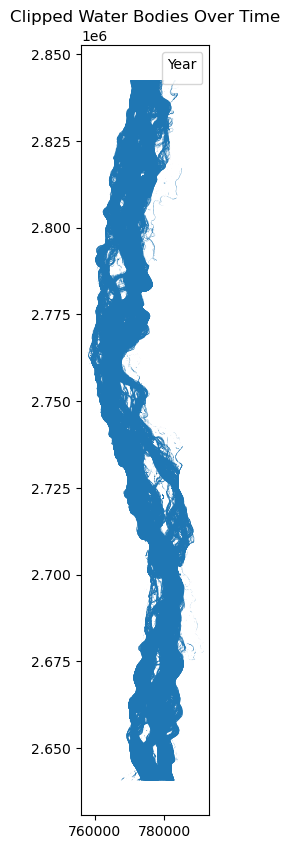

In [13]:
water_bodies_dir = "D:/BUET/Thesis/ArcGIS/Waterbody and Bankline/Final_Waterbody"  # Directory containing all water body shapefiles
aoi_path = "D:/BUET/Thesis/ArcGIS/Waterbody and Bankline/Study_area_SHP/AOI.shp"
output_dir = "D:/BUET/Thesis/ArcGIS/Waterbody and Bankline/Water"

# Load the AOI shapefile
aoi = gpd.read_file(aoi_path)

# Create the output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Prepare a plot
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each shapefile in the water bodies directory
for filename in sorted(os.listdir(water_bodies_dir)):
    if filename.endswith(".shp"):
        # Extract the year from the filename
        year = filename.split('.')[0]

        # Load the water body shapefile
        water_body = gpd.read_file(os.path.join(water_bodies_dir, filename))

        # Clip the water body shapefile with the AOI
        clipped = gpd.clip(water_body, aoi)

        # Save the clipped file with the year in the output directory
        output_path = os.path.join(output_dir, f"water_body_{year}.shp")
        clipped.to_file(output_path)

        # Plot the clipped shapefile on the same axis
        clipped.plot(ax=ax, label=year)

# Set up plot appearance
ax.set_title("Clipped Water Bodies Over Time")
ax.legend(title="Year")
plt.show()